<div style="text-align: center;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Lecci&oacute;n 6, Miércoles 13 de Mayo</span></strong></h1>

<h2>Procesamienro de imágenes con Histogramas</h2>
    
<p>Un histograma es el gráfico de la representación de distribuciones de frecuencias, en el que se emplean rectángulos dentro de unas cordenadas.</p>
<p> En nuestro caso utilizaremos los histogramas para determinar el valor de una intensidad de un pixel en una imagen</p>

<p> Por ejemplo, se considera la matriz $A\in\mathbb{R}^{4\times 4}$, tal que </p>

<p> $$ A = \left( \begin{matrix} 0 & 5 & 3 & 1 \\ 2 & 5 & 1 & 0 \\ 0 & 2 & 4 & 1 \\ 0 & 0 & 0 & 1 \end{matrix} \right) $$ </p>

<p> Es claro que los valores que toma $A$ están en el conjunto $\{0,1,2,3,4,5\}$.</p> 

| Valor | Repeticiones |
|:-----:|:------------:|
|   0   |       6      |
|   1   |       4      |
|   2   |       2      |
|   3   |       1      |
|   4   |       1      |
|   5   |       2      |
    
 <p> En imagenes a escala de grises, tenemos una matriz  $A\in\mathbb{R}^{m\times n}$ donde cada entrada (pixel) toma los valores en el conjunto $\{0,...,255\}$.</p>
 
 <p> El histograma de una imagen es la representacion de la frecuencia de aparicion de cada nivel de gris en la imagen.</p>
 
 <p>Cada entrada individual del histograma se expresa de la siguiente manera</p>
 
 <p>$$h(k) = n_{k} = card { (x,y) / f(x,y) = k $$</p> 
 
 <p>$$ h = [h(0),  h(1)  ... h(255)]\in\mathbb{R}^{255}$$
 

<h2>Forma #1 de Generar Histogramas</h2>

t1 =  1.1406


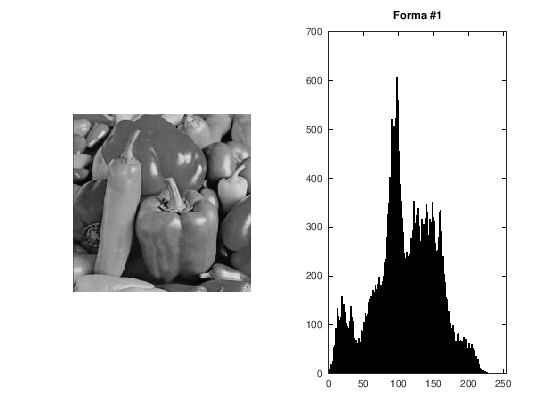

In [26]:
clc; clear
pkg load image
%Ejemplo #1 sobre Histogramas
A=imread('media/peppers.jpg');

%Para ver si es a colores o escala de grises, se calcula el tamaño (Esta es a escala de grises)
size(A);
subplot(1,2,1)
imshow(A)

%Calcular el tiempo de la forma #1
tic

%Forma #1 de calcular el histograma
h1 = zeros(256,1); [m,n] = size(A);  %h1 = [h(0), h(1), h(2),....h(255)]

for i= 1:m
    for j = 1:n
        h1 (A(i,j) + 1) = h1 (A(i,j) + 1) + 1; %Sumo lo que hay en el anterior, y sumo 1
    end
end

subplot(1,2,2);
bar (0:255, h1) %Graficar Histograma
title("Forma #1")
xlim([0,255]) %Limite en el eje x de la grafica
t1 = toc

<h2>Forma #2 de Generar Histogramas</h2>

t2 =  0.36664


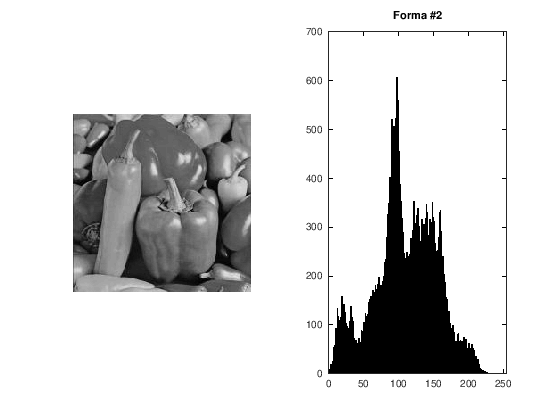

In [27]:
clc; clear
pkg load image
%Ejemplo #1 sobre Histogramas
A=imread('media/peppers.jpg');

%Para ver si es a colores o escala de grises, se calcula el tamaño (Esta es a escala de grises)
size(A);
subplot(1,2,1)
imshow(A)

%Calcular el tiempo de la forma #1
tic

%Forma #2 de calcular el histograma
h2 = zeros(256,1);  %h1 = [h(0), h(1), h(2),....h(255)]

for i = 0:255
    h2(i+1) = sum(sum(A == i)); 
end

subplot(1,2,2);
bar (0:255, h2) %Graficar Histograma
title("Forma #2")
xlim([0,255]) %Limite en el eje x de la grafica
t2 = toc

<h2>Forma #3 de Generar Histogramas</h2>

t2 =  0.34216


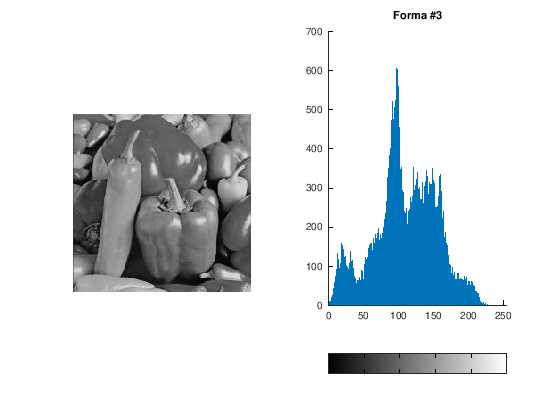

In [28]:
clc; clear
pkg load image
%Ejemplo #1 sobre Histogramas
A=imread('media/peppers.jpg');

%Para ver si es a colores o escala de grises, se calcula el tamaño (Esta es a escala de grises)
size(A);

subplot(1,2,1)
imshow(A)

%Forma #3
tic %Tiempo que dura 
subplot(1,2,2);
imhist(A) %Comando para calcular el histograma
title("Forma #3")
t2 = toc


<div style="text-align: center;" role="presentation">
<h1 role="presentation"><strong><span role="presentation">Técnicas para modificar imágenes con el Histograma</span></strong></h1>

<h2>Ecualización del Histograma</h2>

<p>Es una teécnica que cambia la distribución de gris de una imagen de tal manera que se obtiene un histograma resultante uniforme, en el que el porcentaje de pixeles de cada nivel de grises es el mismo.</p>
    
    <p>Para esto, necesitamos una función auxiliar $T(r)$, que satisface 2 criterios:</p>
    
    - $T(r)$ es una función creciente [0, 255]
    - 0 <= T(r) <= 1, para todo r que pertenece [0,255]
    
Un ejemplo de esta transformacion es la funcion de distribucion acumulativa (cdf).
    
FORMULA
    
Donde n es el # total de pixeles.

Ejemplo: Sea h = $[1,3,2,4]$

El vector acumulado es $a$ = $[1/4, 4/4, 6/4, 10/4]$

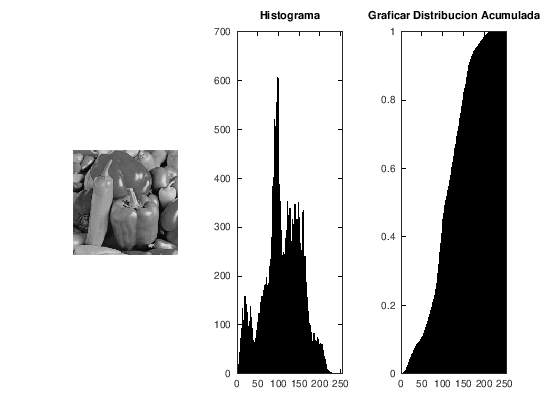

In [31]:
clc; clear
pkg load image
%Ejemplo #1 sobre Histogramas
A=imread('media/peppers.jpg');

%Para ver si es a colores o escala de grises, se calcula el tamaño (Esta es a escala de grises)
size(A);
subplot(1,3,1)
imshow(A)
[m,n] = size(A);

%Calculo del Histograma
h2 = zeros(256,1);  %h1 = [h(0), h(1), h(2),....h(255)]

for i = 0:255
    h2(i+1) = sum(sum(A == i)); 
end

subplot(1,3,2);
bar (0:255, h2) %Graficar Histograma
title("Histograma")
xlim([0,255]) %Limite en el eje x de la grafica

%Distribucion Acumulada
ac = zeros(256,1);%Vector acumulado

for i=0:255 
    ac(i+1) = sum(h2(1:i+1)) / (m*n);
end

subplot(1,3,3);
bar (0:255, ac) %Graficar Distribucion Acumulada
title("Graficar Distribucion Acumulada")
xlim([0,255]) %Limite en el eje x de la grafica


<p> Sea $A\in\mathbb{R}^{m\times n}$, con valores en sus entradas iguales a $0,1,...255$. Cambiaremos el valor de la posición $A_{i,j}$ por el valor $s_{k} * 255$, es decir, la transformada consiste en la siguiente formula: </p>

<p> $$\left \| A_{i,j} = s_{k} * 255 \right \|$$ </p>


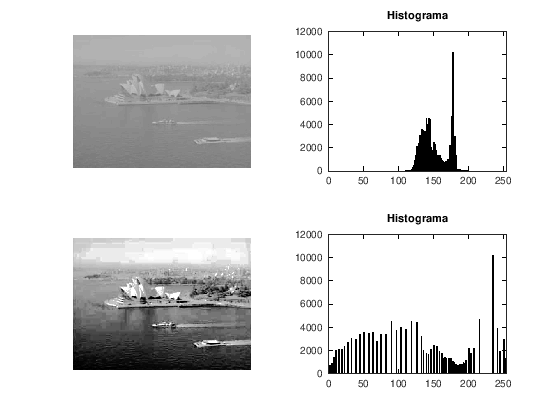

In [38]:
clc; clear
pkg load image
%Ejemplo #1 sobre Histogramas
A=imread('media/sydney.jpg');

%Para ver si es a colores o escala de grises, se calcula el tamaño (Esta es a escala de grises)
size(A);
subplot(2,2,1)
imshow(A)
[m,n] = size(A);

%Calculo del Histograma
h2 = zeros(256,1);  %h1 = [h(0), h(1), h(2),....h(255)]

for i = 0:255
    h2(i+1) = sum(sum(A == i)); 
end

subplot(2,2,2);
bar (0:255, h2) %Graficar Histograma
title("Histograma")
xlim([0,255]) %Limite en el eje x de la grafica

%Distribucion Acumulada
ac = zeros(256,1);%Vector acumulado

for i=0:255 
    ac(i+1) = sum(h2(1:i+1)) / (m*n);
end

%Obtener la nueva imagen aplicando la tecnica de ecualizacion
B = zeros(m,n); B = uint8(B);

for i = 1:m
    for j = 1:n
        B(i,j) = round(ac(A(i,j)+1) * 255);
    end
end

subplot(2,2,3);
imshow(B)

%Calculo del Histograma
h3 = zeros(256,1);  %h1 = [h(0), h(1), h(2),....h(255)]

for i = 0:255
    h3(i+1) = sum(sum(B == i)); 
end

subplot(2,2,4);
bar (0:255, h3) %Graficar Histograma
title("Histograma")
xlim([0,255]) %Limite en el eje x de la grafica


<h2>Estiramiento del Histograma</h2>

<p>Esta técnica consiste en la transformación lineal que expande parte del histograma original tal que la intensidad original que está en el intervalo $[r_{min}, r_{max}]$, ocupe toda la escala $[0, 255]$.</p>


<p>Matematicamnete, cada pixel d la nueva imagen $B$ se obtiene de la formula 
<p/>



<p>Donde $r_{min}$ y $r_{max}$ son los valores más pequeños y más grandes en escala de grises de $A$.</p>





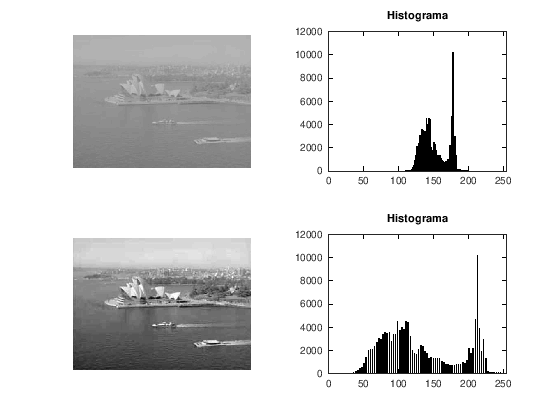

In [4]:
%Ejemplo de Estiramiento del Histograma.

clc; clear;
pkg load image

A = imread("media/sydney.jpg");
subplot(2,2,1);
imshow(A);

%Calculo del Histograma
h1 = zeros(256,1);  %h1 = [h(0), h(1), h(2),....h(255)]

for i = 0:255
    h1(i+1) = sum(sum(A == i)); 
end

subplot(2,2,2);
bar (0:255, h1) %Graficar Histograma
title("Histograma")
xlim([0,255]) %Limite en el eje x de la grafica

%Modificacion de la imagen estirando el histograma
r_min = min(min(A));
r_max = max(max(A));

B = (255/(r_max-r_min)) * (A-r_min);
subplot(2,2,3);
imshow(B);

%Calculo del Histograma
h2 = zeros(256,1);  %h1 = [h(0), h(1), h(2),....h(255)]

for i = 0:255
    h2(i+1) = sum(sum(B == i)); 
end

subplot(2,2,4);
bar (0:255, h2) %Graficar Histograma
title("Histograma")
xlim([0,255]) %Limite en el eje x de la grafica


<h2>Reducción del Histograma</h2>

<p>Esta técnica modifica el histograma original de tal manera que comprime la dinámica de escala de grises $[r_{min}, r_{max}]$ a otra esacla $[s_{min}, s_{max}]$, donde: $r_{min}$ < $s_{min}$ y $s_{max}$ < $s_{max}$ </p>

<p>Matematicamnete, cada pixel $B_{i,j}$ de la imagen $B$ modificada se obtiene de la fórmula <p/>


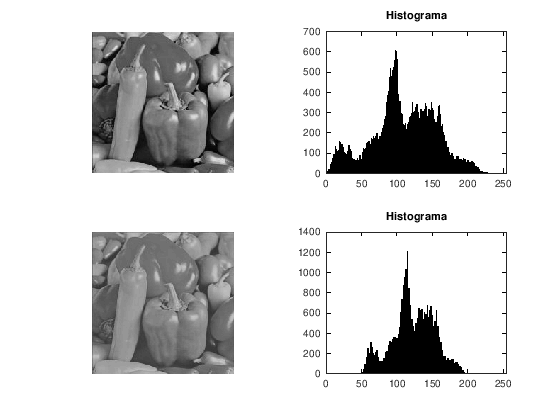

In [7]:
clc; clear
pkg load image

A = imread("files/peppers.jpg");
subplot(2,2,1);
imshow(A);

A = double(A);
%Calculo del Histograma
h1 = zeros(256,1);  %h1 = [h(0), h(1), h(2),....h(255)]

for i = 0:255
    h1(i+1) = sum(sum(A == i)); 
end

subplot(2,2,2);
bar (0:255, h1) %Graficar Histograma
title("Histograma")
xlim([0,255]) %Limite en el eje x de la grafica

%Modificacion de la imagen estirando el histograma
r_min = min(min(A)); %107
r_max = max(max(A)); %202

s_min = 50;
s_max = 200;

B = round(((s_max - s_min) / (r_max - r_min)) * (A - r_min) + s_min);
B = uint8(B);
subplot(2,2,3);
imshow(B);

%Calculo del Histograma
h2 = zeros(256,1);  %h1 = [h(0), h(1), h(2),....h(255)]

for i = 0:255
    h2(i+1) = sum(sum(B == i)); 
end

subplot(2,2,4);
bar (0:255, h2) %Graficar Histograma
title("Histograma")
xlim([0,255]) %Limite en el eje x de la grafica
